In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [4]:
#df.info()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

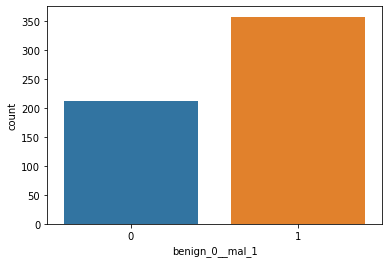

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

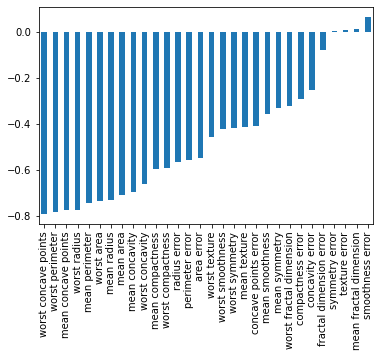

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

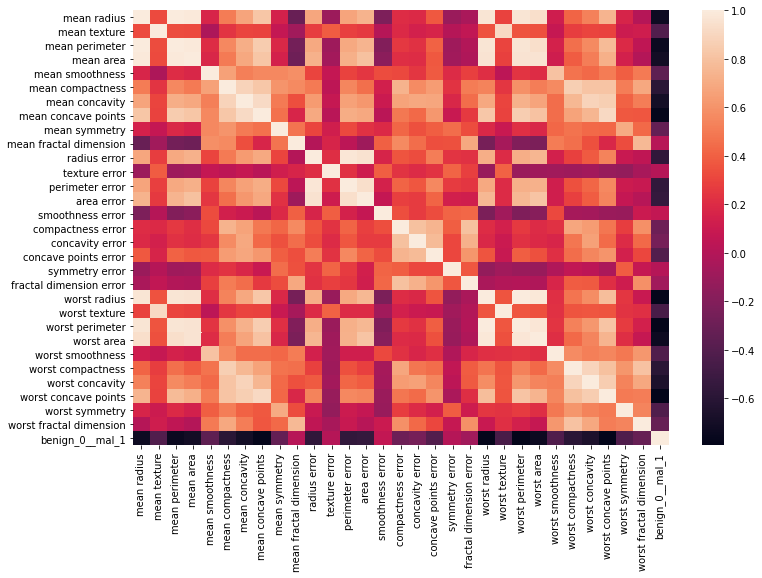

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
##############################################################################################


#                DEALING WITH OVER FITTING                   ###############################

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Dropout

In [18]:
X_train.shape

(426, 30)

In [19]:
trained_net = Sequential()

trained_net.add(Dense(30,activation='relu'))

trained_net.add(Dense(15,activation='relu'))

#Binary Classification
trained_net.add(Dense(1,activation='sigmoid'))

trained_net.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
trained_net.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 41ms/step - loss: 0.6814 - val_loss: 0.6652
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6576 - val_loss: 0.6441
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6344 - val_loss: 0.6181
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6068 - val_loss: 0.5879
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5740 - val_loss: 0.5503
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5341 - val_loss: 0.5065
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4898 - val_loss: 0.4571
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4425 - val_loss: 0.4077
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3918 - val_loss: 0.3585
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3442 - val_loss: 0.3119
Epoch 11

In [21]:
losses = pd.DataFrame(trained_net.history.history)

<AxesSubplot:>

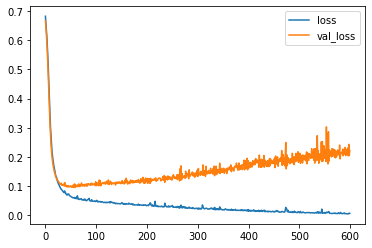

In [22]:
#THis is a demonstration of overfitting (meaning we're using too many epochs)
losses.plot()

In [23]:
trained_net = Sequential()

trained_net.add(Dense(30,activation='relu'))

trained_net.add(Dense(15,activation='relu'))

#Binary Classification
trained_net.add(Dense(1,activation='sigmoid'))

trained_net.compile(loss='binary_crossentropy',optimizer='adam')

In [24]:
# We can use early callbacks to stop the model from overfitting.

from tensorflow.keras.callbacks import EarlyStopping

In [25]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [26]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [27]:
trained_net.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
               callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6920 - val_loss: 0.6433
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6134 - val_loss: 0.5774
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5493 - val_loss: 0.5156
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4871 - val_loss: 0.4577
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4312 - val_loss: 0.4030
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3821 - val_loss: 0.3530
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3398 - val_loss: 0.3125
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3037 - val_loss: 0.2779
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2735 - val_loss: 0.2536
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2542 - val_loss: 0.2310
Epoch 11

<AxesSubplot:>

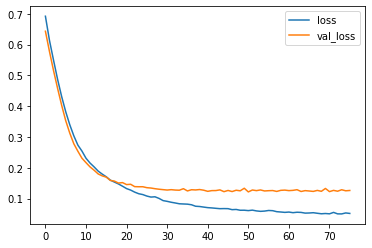

In [28]:
model_loss = pd.DataFrame(trained_net.history.history)

model_loss.plot()

In [1]:
############################################################################################

In [30]:
# We can also use Dropout function to avoid overfitting (as below)
# It essentially turns off some of the neurons to prevent over fitting.

In [31]:
trained_net = Sequential()

trained_net.add(Dense(30,activation='relu'))
trained_net.add(Dropout(0.5)) # add a dropout layer (half of teh neurons are going to be turned off randomly (0.5))

trained_net.add(Dense(15,activation='relu'))
trained_net.add(Dropout(0.5))

#Binary Classification
trained_net.add(Dense(1,activation='sigmoid'))

trained_net.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
trained_net.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
               callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 24ms/step - loss: 0.7081 - val_loss: 0.6811
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6747 - val_loss: 0.6577
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6832 - val_loss: 0.6379
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6554 - val_loss: 0.6173
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6065 - val_loss: 0.5925
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6060 - val_loss: 0.5667
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5896 - val_loss: 0.5409
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5597 - val_loss: 0.5148
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5367 - val_loss: 0.4876
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5280 - val_loss: 0.4561
Epoch 11

<AxesSubplot:>

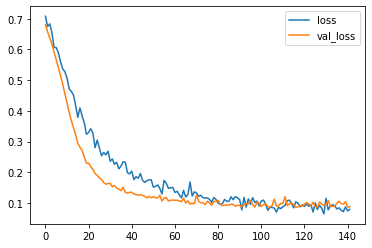

In [33]:
new_model_loss = pd.DataFrame(trained_net.history.history)
new_model_loss.plot()

In [34]:
predictions = trained_net.predict_classes(X_test)
#np.argmax(trained_net.predict(X_test),axis=-1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
from sklearn.metrics import classification_report,confusion_matrix


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
print(confusion_matrix(y_test,predictions))

[[52  3]
 [ 1 87]]
